In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,9)})

# Project Goal: to analyse sales to draw conclusions about video game sales by publisher and region.

### Subgoals

1) Visualise trend of game sales, games published, and ratio of sales to published games.

2) Rank publishers according to sales:publishing ratio to see which publisher and game has the best sales:publication ratio.

3) Discover which genre sells best in which region.

In [2]:
vg_sales = pd.read_csv('vgsales.csv')
vg_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# 1.0 Data Cleaning

In [3]:
#Check for Null values

True in vg_sales.isna()

#No Null values in dataset

False

In [4]:
#Check for duplicate rows

vg_sales[vg_sales.duplicated()]

#No duplicate rows in dataset

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


# 1.1 Time-Series Analysis

Text(0, 0.5, 'Global Sales (millions)')

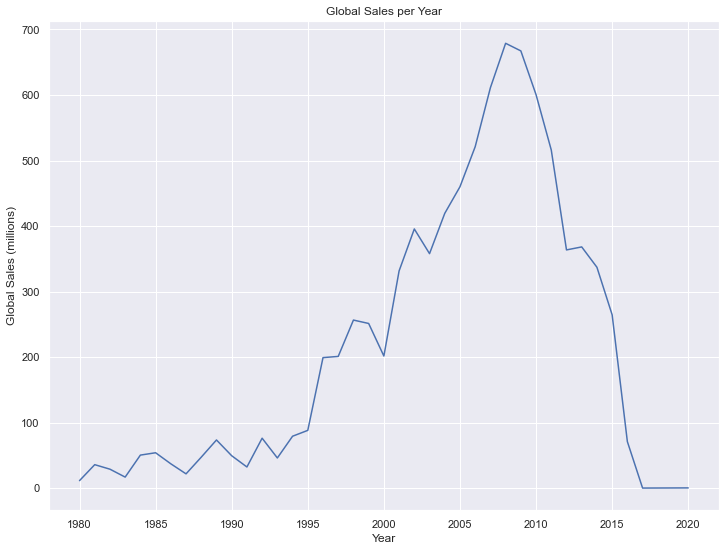

In [5]:
#Global sales per year.

yearly_sales = vg_sales.groupby('Year').sum()
sns.lineplot(data=yearly_sales, x=yearly_sales.index, y='Global_Sales')
plt.title('Global Sales per Year')
plt.ylabel('Global Sales (millions)')

Text(0, 0.5, 'Sales (millions)')

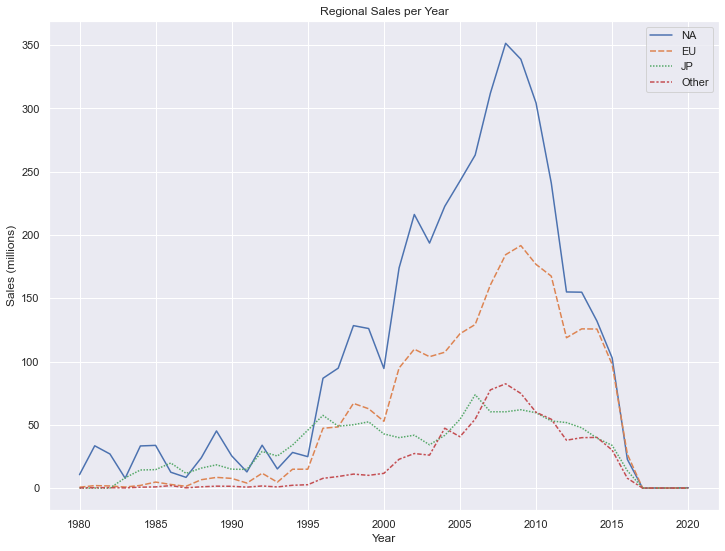

In [6]:
#Per region

yearly_reg_sales = vg_sales.groupby('Year').sum()
yearly_reg_sales.drop(['Rank', 'Global_Sales'], axis=1, inplace=True)
yearly_reg_sales.rename(columns={'NA_Sales':'NA', 'EU_Sales':'EU', 'JP_Sales':'JP', 'Other_Sales':'Other'}, inplace=True)

sns.lineplot(data=yearly_reg_sales)
plt.title('Regional Sales per Year')
plt.ylabel('Sales (millions)')

Text(0, 0.5, 'Number of Games')

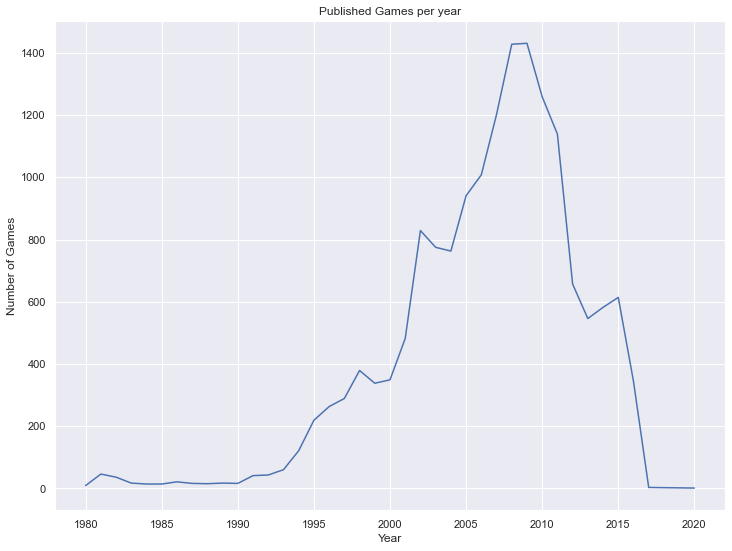

In [7]:
#Published Games per year

yearly_games = vg_sales.groupby('Year').count()
sns.lineplot(data=yearly_games, x=yearly_games.index, y='Name')
plt.title('Published Games per year')
plt.ylabel('Number of Games')

Text(0, 0.5, 'Sales per Games Published (millions)')

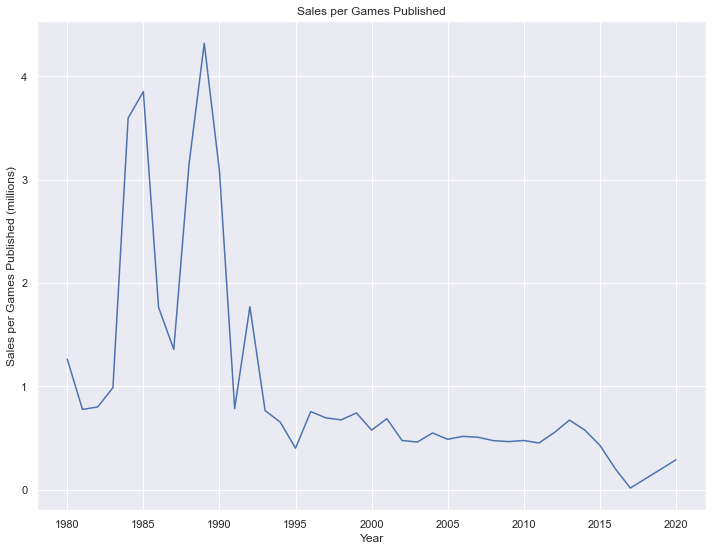

In [8]:
#Ratio of games sold to games published.

ratio = pd.DataFrame(yearly_sales['Global_Sales'] / yearly_games['Name'], columns=['ratio'])
sns.lineplot(data=ratio, x=ratio.index, y='ratio')
plt.title('Sales per Games Published')
plt.ylabel('Sales per Games Published (millions)')

The above shows us the Global Sales per year and then the total number of Games Published per year.

By taking the ratio (Games Sold / Games Published) we can see if individual games in general are sold more or if the trend of increased sales is caused by increased publishing.

From global sales, we can conclude that while global sales have increased, this is mainly due to more published games.

I will now perform the analysis for each publisher and each region to see if the conclusion holds true in each case.

# 2.0 Best Publisher by Sales:Publication Ratio

In [9]:
#Get total sales and total games published

sales_sum = vg_sales.groupby('Publisher').sum()
sales_sum.reset_index(inplace=True)
sales_sum.drop(['Rank', 'Year'], axis=1, inplace=True)
sales_sum

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,10TACLE Studios,0.07,0.04,0.00,0.00,0.11
1,1C Company,0.01,0.07,0.00,0.02,0.10
2,20th Century Fox Video Games,1.82,0.10,0.00,0.01,1.94
3,2D Boy,0.00,0.03,0.00,0.01,0.04
4,3DO,6.48,3.04,0.00,0.63,10.12
...,...,...,...,...,...,...
573,id Software,0.02,0.00,0.00,0.00,0.03
574,imageepoch Inc.,0.00,0.00,0.04,0.00,0.04
575,inXile Entertainment,0.02,0.06,0.00,0.01,0.10
576,"mixi, Inc",0.00,0.00,0.86,0.00,0.86


In [10]:
games_count = vg_sales.groupby('Publisher').count()
games_count.reset_index(inplace=True)
games_count = games_count[['Publisher', 'Name']]
games_count.rename(columns={'Name':'Games_Published'}, inplace=True)
games_count

,Publisher,Games_Published
0,10TACLE Studios,3
1,1C Company,3
2,20th Century Fox Video Games,5
3,2D Boy,1
4,3DO,36
...,...,...
573,id Software,1
574,imageepoch Inc.,2
575,inXile Entertainment,1
576,"mixi, Inc",1


In [11]:
#Concatenate dataframes
df = pd.concat([sales_sum[['Publisher', 'Global_Sales']], games_count['Games_Published']], axis=1)
df['Ratio'] = df['Global_Sales'] / df['Games_Published']
df

,Publisher,Global_Sales,Games_Published,Ratio
0,10TACLE Studios,0.11,3,0.036667
1,1C Company,0.10,3,0.033333
2,20th Century Fox Video Games,1.94,5,0.388000
3,2D Boy,0.04,1,0.040000
4,3DO,10.12,36,0.281111
...,...,...,...,...
573,id Software,0.03,1,0.030000
574,imageepoch Inc.,0.04,2,0.020000
575,inXile Entertainment,0.10,1,0.100000
576,"mixi, Inc",0.86,1,0.860000


In [12]:
#Acquire top publisher-year ratio

sorted_df = df.sort_values('Ratio', ascending=False)
sorted_df

,Publisher,Global_Sales,Games_Published,Ratio
385,Palcom,4.17,1,4.170000
424,Red Orb,5.24,2,2.620000
359,Nintendo,1786.56,703,2.541337
40,Arena Entertainment,4.72,2,2.360000
522,UEP Systems,2.25,1,2.250000
...,...,...,...,...
389,Paradox Development,0.01,1,0.010000
96,Commseed,0.01,1,0.010000
364,Nitroplus,0.02,2,0.010000
76,Boost On,0.01,1,0.010000


# Conclusion: The publisher with the best sales:published game ratio was Palcom.

### Palcom only published 1 game which sold 4.17 million copies, which game was this?

In [13]:
vg_sales[vg_sales['Publisher'] == 'Palcom']

#This game was Teenage Mutant Ninja Turtles released in 1989 on the NES.

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
276,277,Teenage Mutant Ninja Turtles,NES,1989.0,Action,Palcom,3.38,0.44,0.31,0.04,4.17


# 2.1 Regions' Best-Selling Genre

In [14]:
#General analysis

genre_sales = vg_sales[['Genre', 'Global_Sales']]
genre_sales = genre_sales.groupby('Genre').sum()
genre_sales.reset_index(inplace=True)
genre_sales

,Genre,Global_Sales
0,Action,1751.18
1,Adventure,239.04
2,Fighting,448.91
3,Misc,809.96
4,Platform,831.37
5,Puzzle,244.95
6,Racing,732.04
7,Role-Playing,927.37
8,Shooter,1037.37
9,Simulation,392.20


Text(0, 0.5, 'Global Sales')

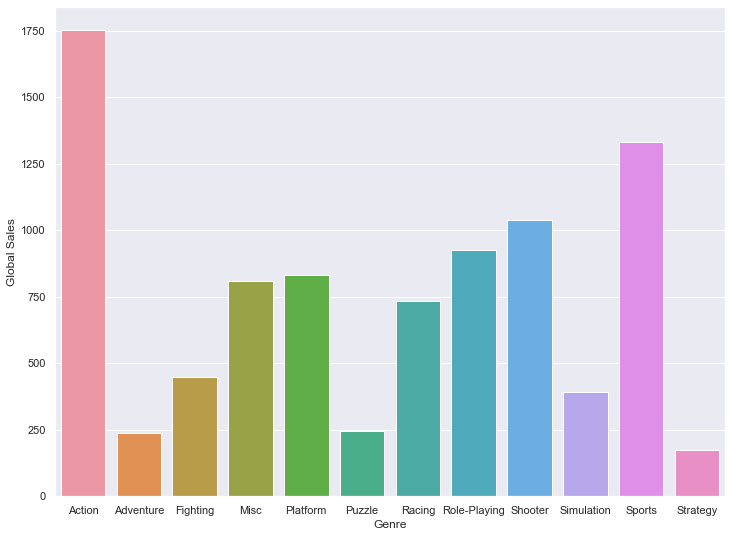

In [15]:
# Bar plot

sns.barplot(data=genre_sales, x='Genre', y='Global_Sales')
plt.ylabel('Global Sales')

In [16]:
#Most games sold are action games. Is this true for all regions?

region_sales = vg_sales[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
region_sales = region_sales.groupby('Genre').sum()
region_sales.rename(columns={'NA_Sales':'NA', 
                             'EU_Sales':'EU', 
                             'JP_Sales':'JP', 
                             'Other_Sales':'Other', 
                             'Global_Sales':'Total'}, inplace=True)
region_sales.sort_values('Total', ascending=False)

,NA,EU,JP,Other,Total
Genre,,,,,
Action,877.83,525.00,159.95,187.38,1751.18
Sports,683.35,376.85,135.37,134.97,1330.93
Shooter,582.60,313.27,38.28,102.69,1037.37
Role-Playing,327.28,188.06,352.31,59.61,927.37
Platform,447.05,201.63,130.77,51.59,831.37
Misc,410.24,215.98,107.76,75.32,809.96
Racing,359.42,238.39,56.69,77.27,732.04
Fighting,223.59,101.32,87.35,36.68,448.91
Simulation,183.31,113.38,63.70,31.52,392.20


In [17]:
region_sales.drop('Total', axis=1).idxmax()

#For most regions, Action games sell the most except Japan, where RPGs sell the most.

NA             Action
EU             Action
JP       Role-Playing
Other          Action
dtype: object

In [18]:
#Acquire columns for percentages of total sales.

percent_sales = region_sales.copy()
for r in ['NA', 'EU', 'JP', 'Other']:
    percent_sales[r] = percent_sales[r] / percent_sales['Total'] * 100
percent_sales.drop('Total', axis=1, inplace=True)
percent_sales

,NA,EU,JP,Other
Genre,,,,
Action,50.127914,29.979785,9.133841,10.700214
Adventure,44.260375,26.828146,21.782965,7.032296
Fighting,49.807311,22.570226,19.458243,8.170903
Misc,50.649415,26.665514,13.304361,9.299225
Platform,53.772688,24.252739,15.729459,6.205420
Puzzle,50.532762,20.730761,23.396612,5.123495
Racing,49.098410,32.565160,7.744112,10.555434
Role-Playing,35.291200,20.278853,37.990230,6.427855
Shooter,56.161254,30.198483,3.690101,9.899072


Text(0.5, 1.0, 'Action Games Sales by Region')

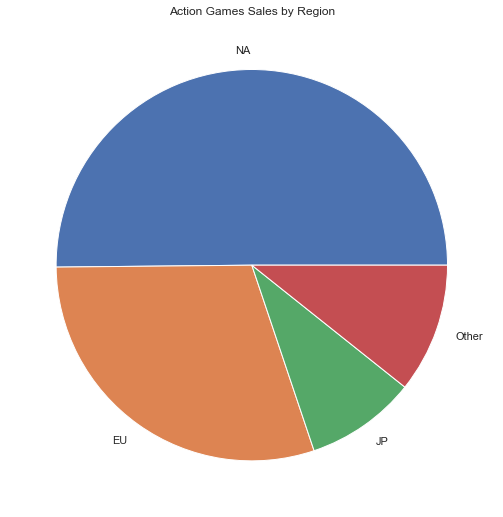

In [19]:
plt.pie(percent_sales.loc['Action'], labels = percent_sales.columns)
plt.title('Action Games Sales by Region')

Text(0.5, 1.0, 'Action Games Sales by Region')

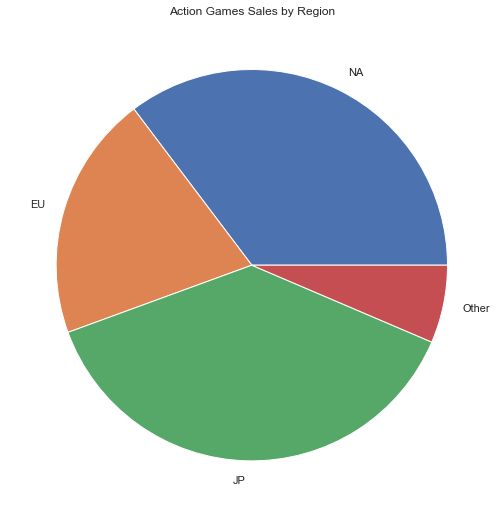

In [20]:
plt.pie(percent_sales.loc['Role-Playing'], labels = percent_sales.columns)
plt.title('Action Games Sales by Region')

# Conclusion: Action games sell the best in most regions except Japan where RPGs sell the best.

# Final Conclusion:

1) Trend of game sales against games published shows that sales per games published has decreased over time.

2) The publisher with the best ratio of (1) is Palcom with their game being Teenage Mutant Ninja Turtles released in 1989 on the NES.

3) Globally and in each region, action games sell the best, except in Japan where RPGs sell the best.

Links:

Dataset: https://www.kaggle.com/gregorut/videogamesales

Github: https://github.com/JamesStewartDouglas/SpartaGlobal